# TASK #1: UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE

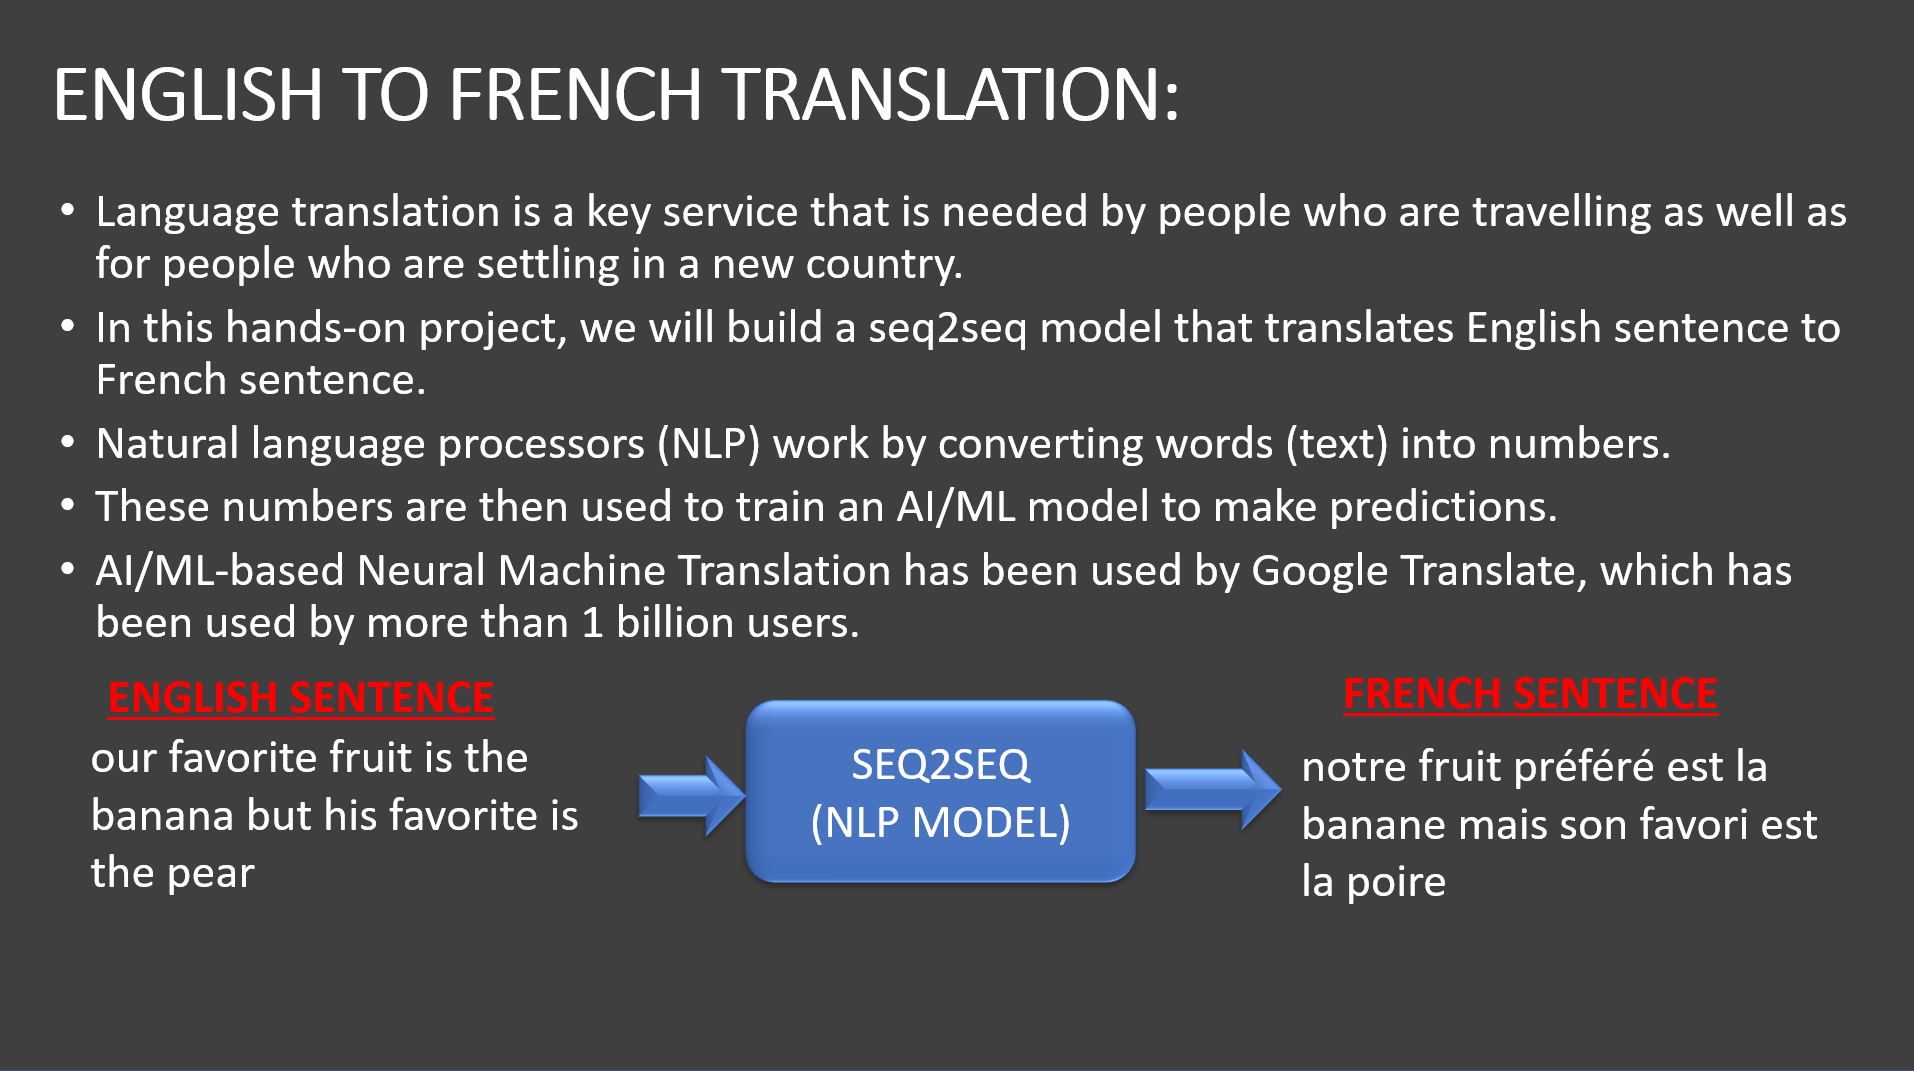

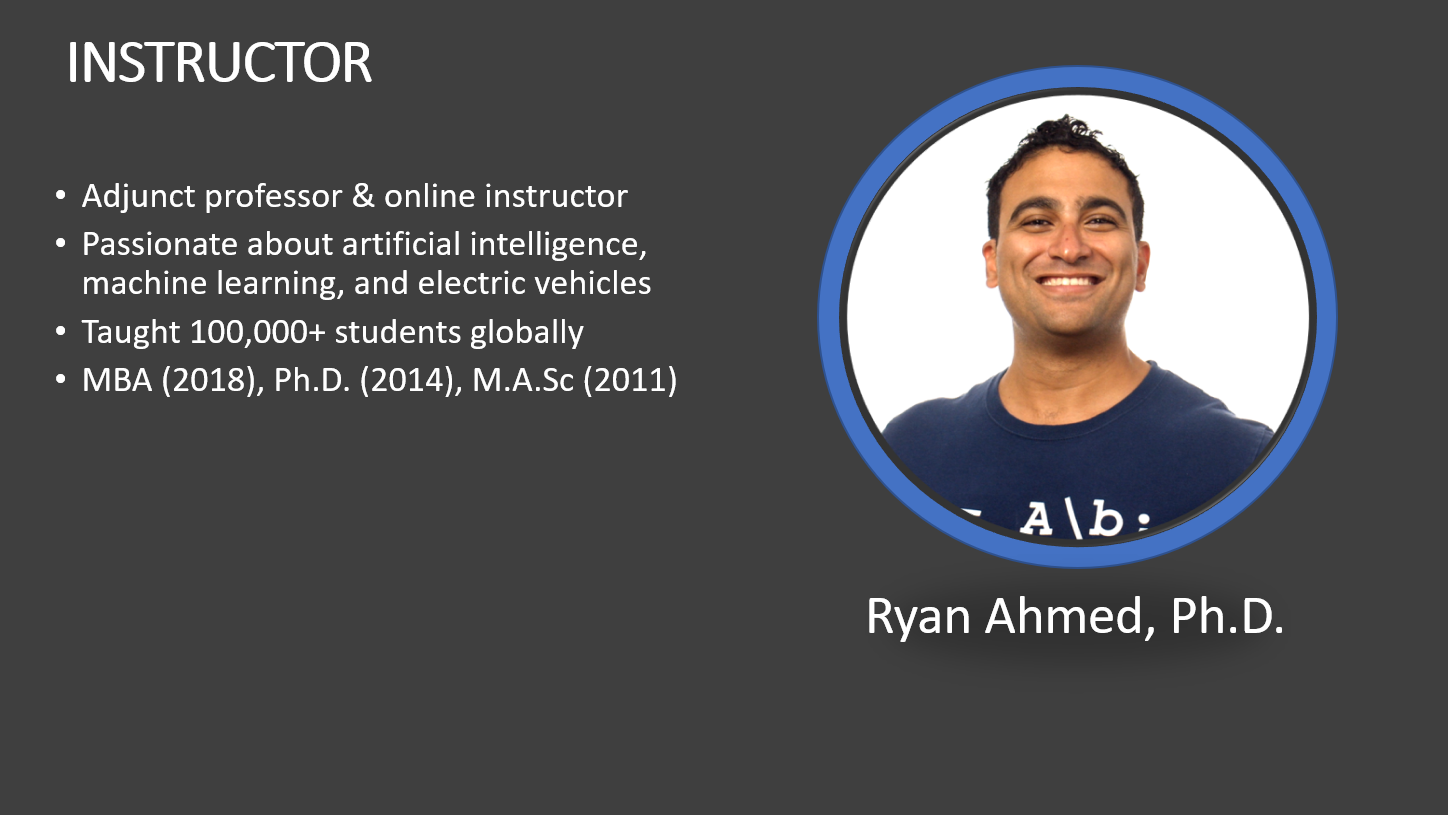

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
!pip install --upgrade tensorflow-gpu==2.0

Requirement already up-to-date: tensorflow-gpu==2.0 in c:\users\administrator\anaconda31\lib\site-packages (2.0.0)


In [2]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [11]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


MINI CHALLENGE #1: 
- Explore the 'english' and 'french' data and indicate how many samples are included.
- Do we have Null elements? What are the memory usage for both dataframes?

In [15]:
df_french.head()

french
0  new jersey est parfois calme pendant l' automn...
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...
2  california est gÃ©nÃ©ralement calme en mars , ...
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...
4  votre moins aimÃ© fruit est le raisin , mais m...

MINI CHALLENGE #2:
- Concatenate both dataframes and indicate how many records are present
- Print out the following: "Total English Records = xx, Total French Records = xx"

In [53]:
df = pd.concat((df_english, df_french), axis=1)

print('Total English Records:', df['english'].size, 'Total frensh Records:', df['french'].size)
df.head(10)

Total English Records: 137860 Total frensh Records: 137860


english  \
0  new jersey is sometimes quiet during autumn , ...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march , and...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape , but my l...   
5  his favorite fruit is the orange , but my favo...   
6  paris is relaxing during december , but it is ...   
7  new jersey is busy during spring , and it is n...   
8  our least liked fruit is the lemon , but my le...   
9  the united states is sometimes busy during jan...   

                                              french  
0  new jersey est parfois calme pendant l' automn...  
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...  
2  california est gÃ©nÃ©ralement calme en mars , ...  
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...  
4  votre moins aimÃ© fruit est le raisin , mais m...  
5  son fruit prÃ©fÃ©rÃ© est l'orange , mais mon p...  
6  paris est relaxant en dÃ©cembre , mais il est ...  
7  new jersey est occupÃ© au printemps , et il es...  
8  notre fruit est moins aimÃ© le citron , mais m...  
9  les Ã©tats-unis est parfois occupÃ© en janvier...

In [51]:
def has_word(column, word):
    array = [word in line for line in column]
    return np.array(array)
df['french'][has_word(df['french'], 'new')]
df_french.head(10)

french
0  new jersey est parfois calme pendant l' automn...
1  les Ã©tats-unis est gÃ©nÃ©ralement froid en ju...
2  california est gÃ©nÃ©ralement calme en mars , ...
3  les Ã©tats-unis est parfois lÃ©gÃ¨re en juin ,...
4  votre moins aimÃ© fruit est le raisin , mais m...
5  son fruit prÃ©fÃ©rÃ© est l'orange , mais mon p...
6  paris est relaxant en dÃ©cembre , mais il est ...
7  new jersey est occupÃ© au printemps , et il es...
8  notre fruit est moins aimÃ© le citron , mais m...
9  les Ã©tats-unis est parfois occupÃ© en janvier...

# TASK #3: PERFORM DATA CLEANING

In [6]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [25]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [26]:
english_words = []
french_words  = []

MINI CHALLENGE #3:
- How many unique words are available in the english and french dictionairies?





In [27]:
uniquelang = [set(), set()]

for i, lang in enumerate(['english', 'french']):
    unique = uniquelang[i]
    for line in df[lang]:
        words = line.split()
        for word in words:
            unique.add(word.lower())
    print('num of unique words in',lang, 'is', len(unique))


num of unique words in english is 199
num of unique words in french is 350


In [13]:
# number of unique words in french


350

# TASK #4: VISUALIZE CLEANED UP DATASET

In [28]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words[:10]

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is']

In [29]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 14046,
         'fruit': 27192,
         'grape': 4848,
         'but': 63987,
         'my': 9700,
         'apple': 4848,
         'his': 9700,
         'favorite': 28332,
         'orange': 4848,
         'paris': 11334,
         'relaxing': 8696,
         'decem

In [30]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [31]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [32]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [19]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [20]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [52]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

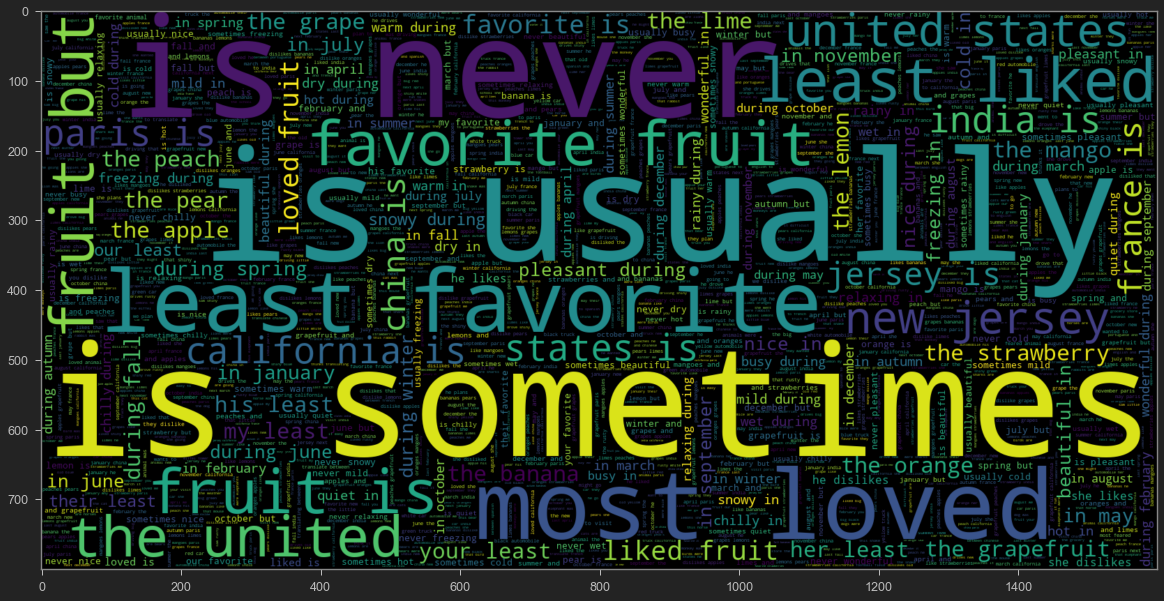

In [34]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [35]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [36]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


MINI CHALLENGE #4 (QUIZ!): 
- Perform similar data visualizations but for the french language instead
- What are the top 3 common french words?!
- What is the maximum number of words in any french document?

In [37]:
french_count = {}
for line in df['french']:
    words = line.lower().split()
    for word in words:
        french_count[word] = french_count.get(word, 0) + 1
french_count

{'new': 11047,
 'jersey': 11052,
 'est': 196809,
 'parfois': 37746,
 'calme': 7256,
 'pendant': 10741,
 "l'": 32917,
 'automne': 14727,
 'et': 59851,
 'il': 84079,
 'neigeux': 1867,
 'en': 105768,
 'avril': 8954,
 'les': 65255,
 'ã©tats-unis': 11210,
 'gã©nã©ralement': 31292,
 'froid': 16794,
 'juillet': 8956,
 'gã¨le': 3622,
 'habituellement': 6215,
 'novembre': 8951,
 'california': 3061,
 'mars': 9023,
 'chaud': 16405,
 'juin': 9133,
 'lã©gã¨re': 63,
 'fait': 2916,
 'septembre': 8958,
 'votre': 9368,
 'moins': 27557,
 'aimã©': 25852,
 'fruit': 23626,
 'le': 35306,
 'raisin': 4852,
 'mais': 63987,
 'mon': 9403,
 'la': 49861,
 'pomme': 4848,
 'son': 16496,
 'prã©fã©rã©': 23305,
 "l'orange": 4848,
 'paris': 11334,
 'relaxant': 8458,
 'dã©cembre': 8945,
 'occupã©': 7782,
 'au': 25738,
 'printemps': 9100,
 'jamais': 37215,
 'chaude': 1124,
 'notre': 8319,
 'citron': 4848,
 'janvier': 9090,
 'chaux': 4848,
 'des': 2435,
 'fruits': 3566,
 'banane': 4848,
 'a': 1356,
 'vu': 645,
 'un': 698,


In [40]:
french_word_count = sorted(french_count, key=french_count.get, reverse=True)
french_word_count

['est',
 'en',
 'il',
 'les',
 'mais',
 'et',
 'la',
 'parfois',
 'jamais',
 'le',
 "l'",
 'gã©nã©ralement',
 'moins',
 'aimã©',
 'au',
 'fruit',
 'prã©fã©rã©',
 'agrã©able',
 'froid',
 'son',
 'chaud',
 'de',
 'plus',
 'automne',
 'mois',
 'ã',
 'elle',
 'citrons',
 'paris',
 'inde',
 'ã©tats-unis',
 'france',
 'jersey',
 'new',
 'chine',
 'pendant',
 'pamplemousse',
 'mon',
 'votre',
 'juin',
 'printemps',
 'janvier',
 'hiver',
 'mars',
 'ã©tã©',
 'mai',
 'septembre',
 'juillet',
 'avril',
 'novembre',
 'dã©cembre',
 'fã©vrier',
 'octobre',
 'aime',
 'aoã»t',
 'merveilleux',
 'relaxant',
 'doux',
 'humide',
 'notre',
 'californie',
 'sec',
 'leur',
 'occupã©',
 'pluvieux',
 'calme',
 'beau',
 'habituellement',
 'pommes',
 'pãªches',
 'oranges',
 'poires',
 'fraises',
 'bananes',
 'verts',
 'raisins',
 'mangues',
 "d'",
 'mangue',
 'gel',
 'raisin',
 'pomme',
 "l'orange",
 'citron',
 'chaux',
 'banane',
 'poire',
 'fraise',
 'pãªche',
 'pas',
 'enneigã©e',
 'favori',
 'dã©teste',
 'gã

In [43]:
px.bar(x = list(french_count.keys()), y= list(french_count.values()))

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('gÃ©nÃ©ralement', 31292),
 ('moins', 27557),
 ('aimÃ©', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('prÃ©fÃ©rÃ©', 23305),
 ('agrÃ©able', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('Ã', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('Ã©tats-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('Ã©tÃ©', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('dÃ©cembre', 8945),
 ('fÃ©vrier', 8942),
 ('octob

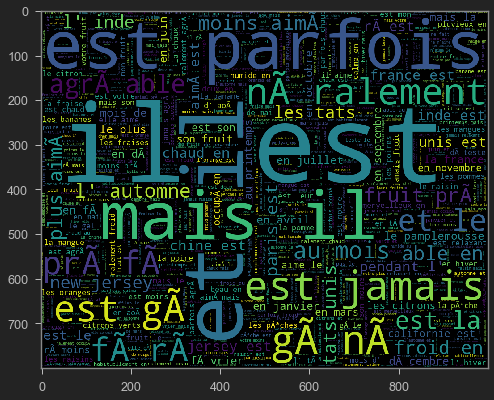

In [45]:
wc = WordCloud(max_words=2000, width=1000, height=800).generate(' '.join(df['french']))
plt.imshow(wc)

In [46]:
maxlen_french = -1
for line in df['french']:
    tokens = nltk.word_tokenize(line)
    if len(tokens) > maxlen_french:
        maxlen_french = len(tokens)
print('max lenght of any line in french:', maxlen_french)

max lenght of any line in french: 24


The maximum number of words in any document =  24


# TASK #5: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

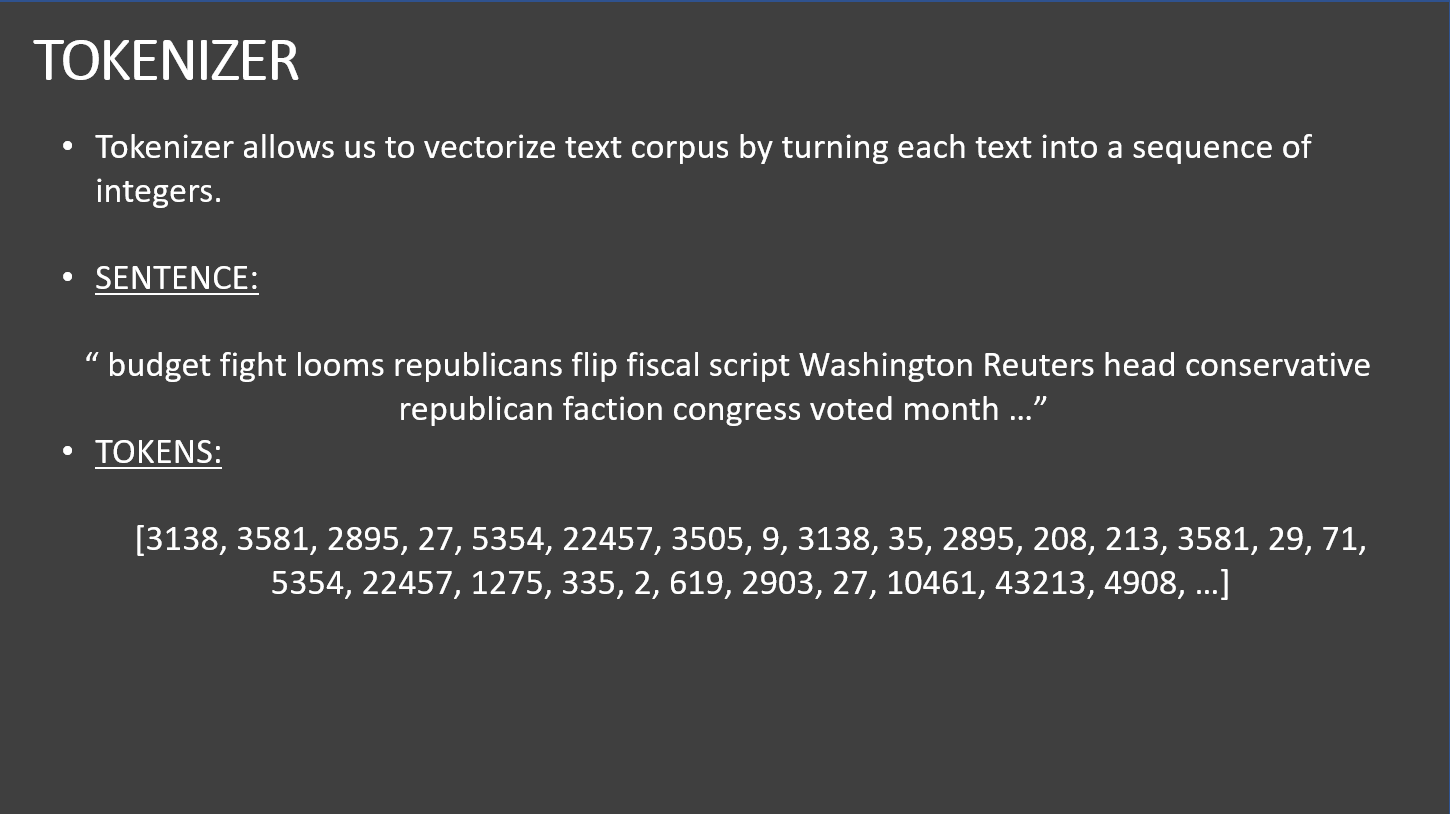

In [54]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [80]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [81]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [62]:
total_english_words ,total_french_words= [len(uniq) for uniq in uniquelang]

In [82]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [83]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit , but the banana is your favorite . 
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [70]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit prÃ©fÃ©rÃ© , mais la banane est votre favori . 
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [84]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [85]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril          "

In [86]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

MINI CHALLENGE #5:
- Change the padding length so that both english and french have the same length

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM


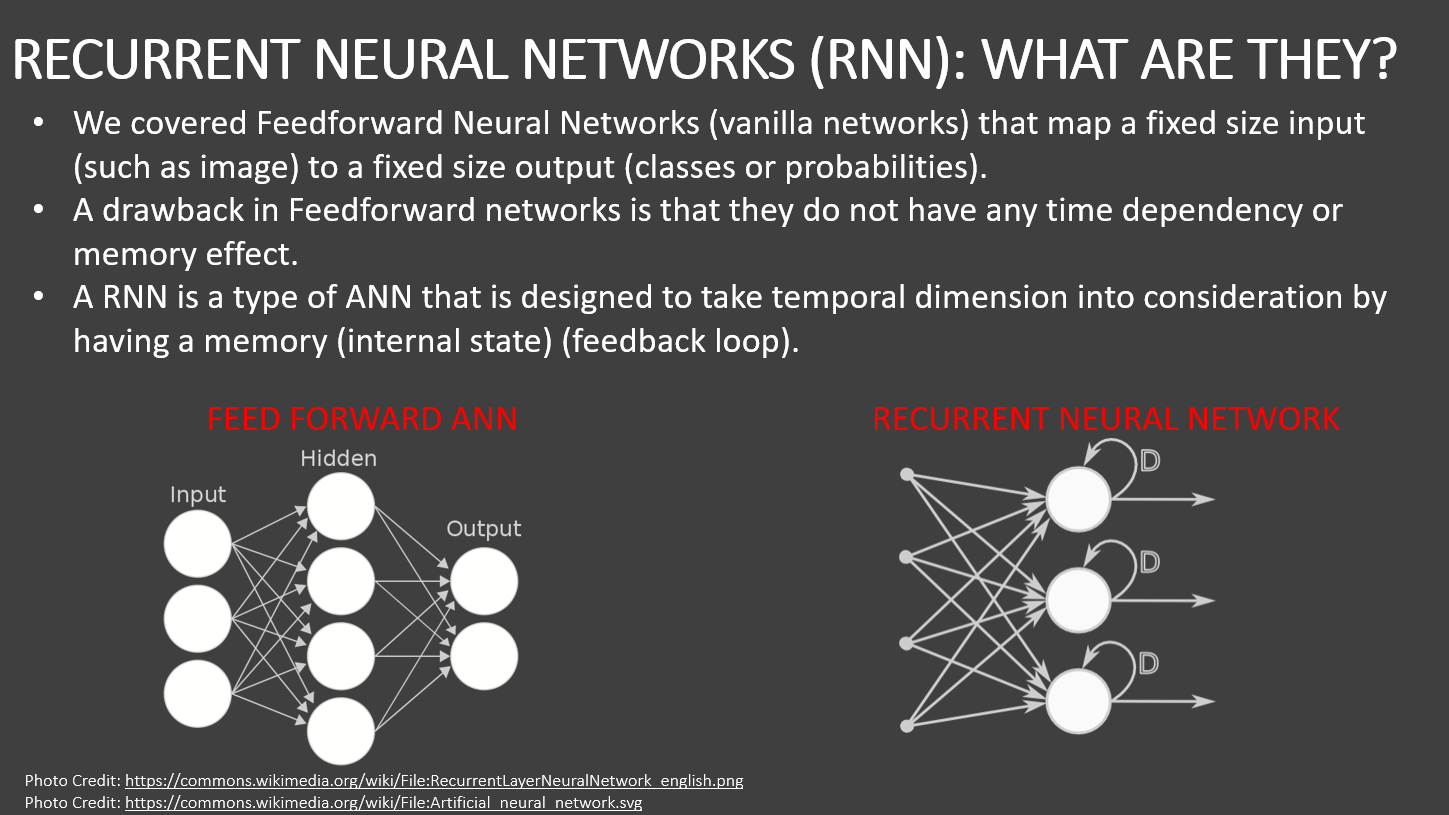

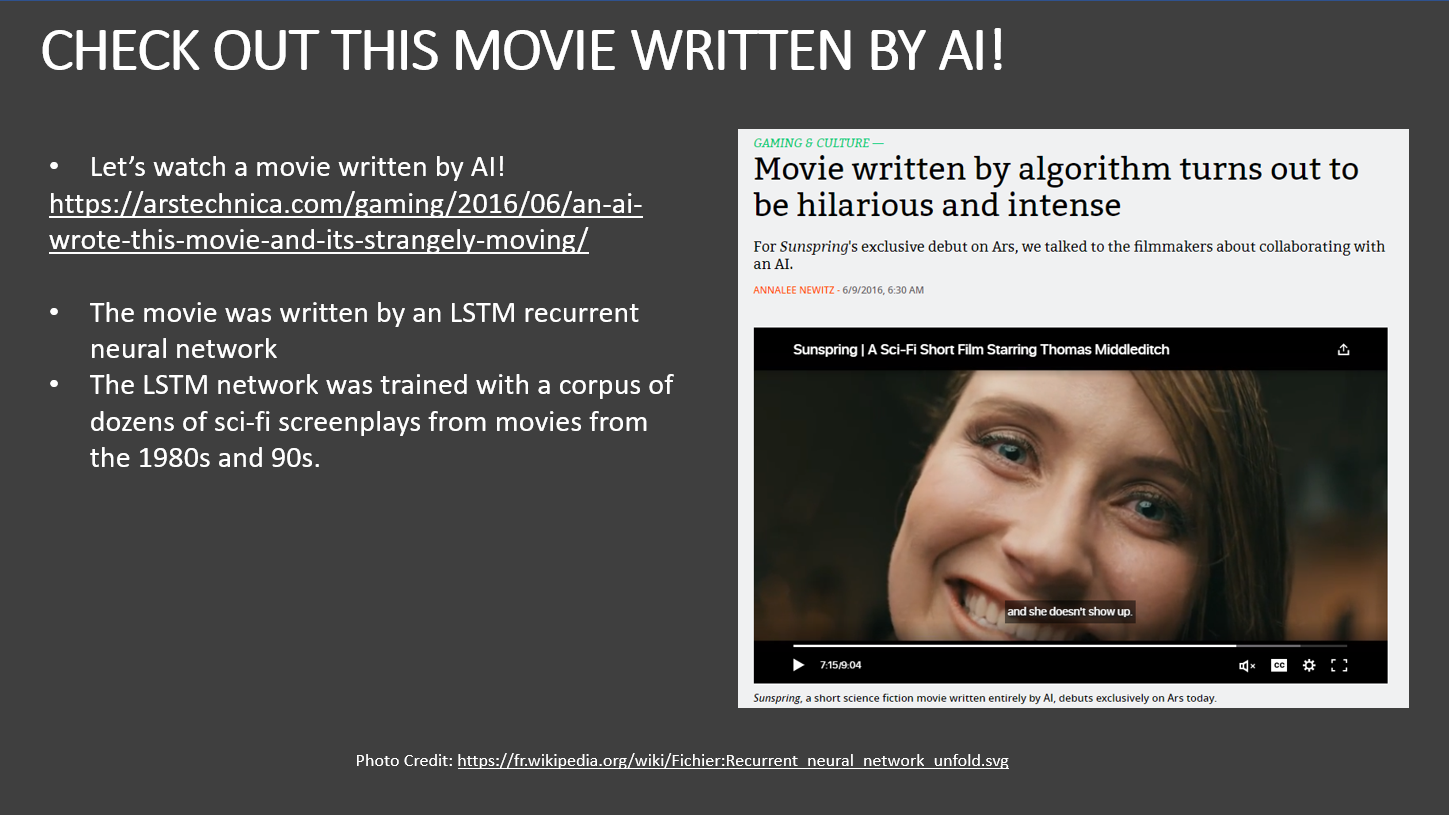

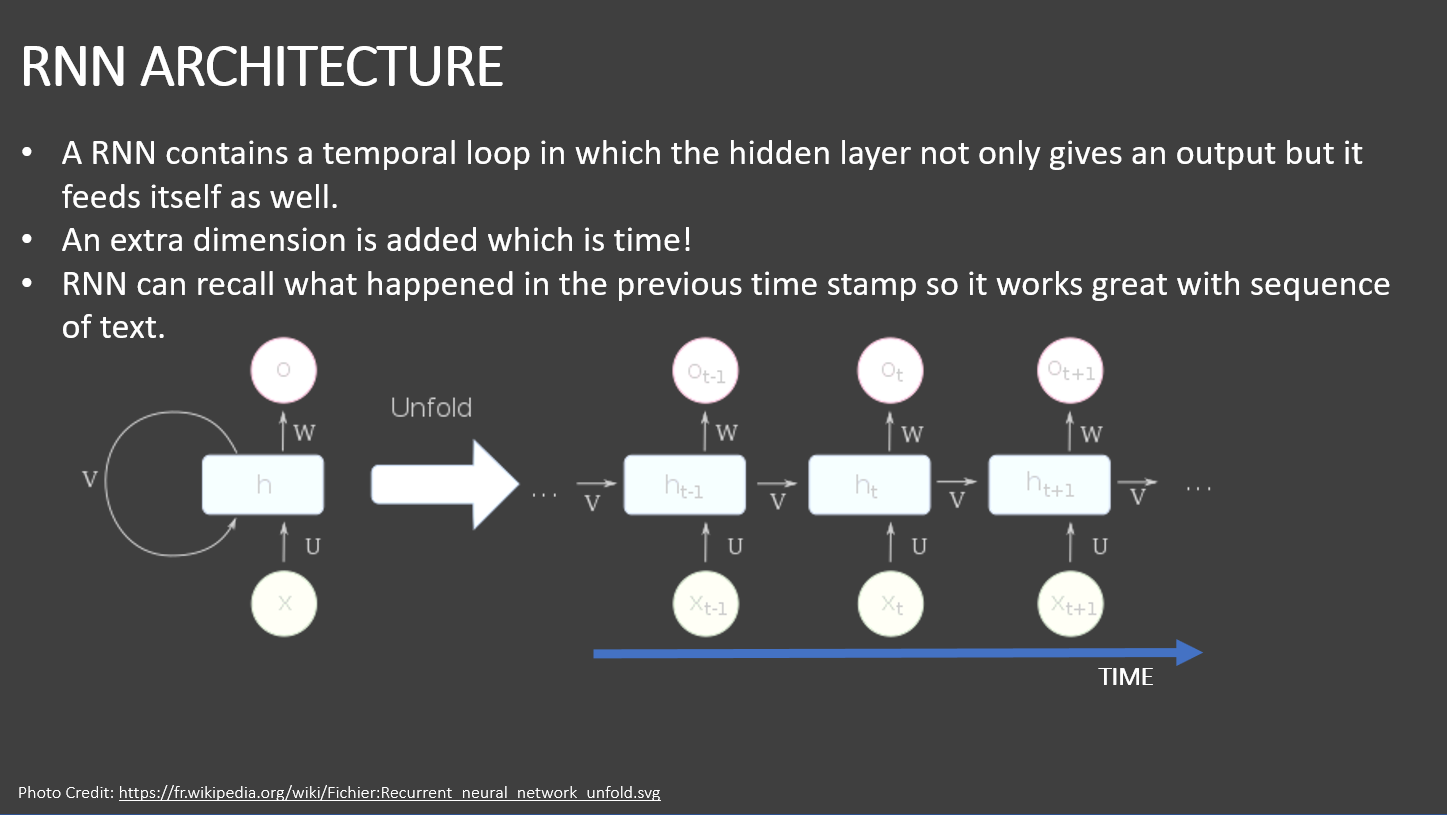

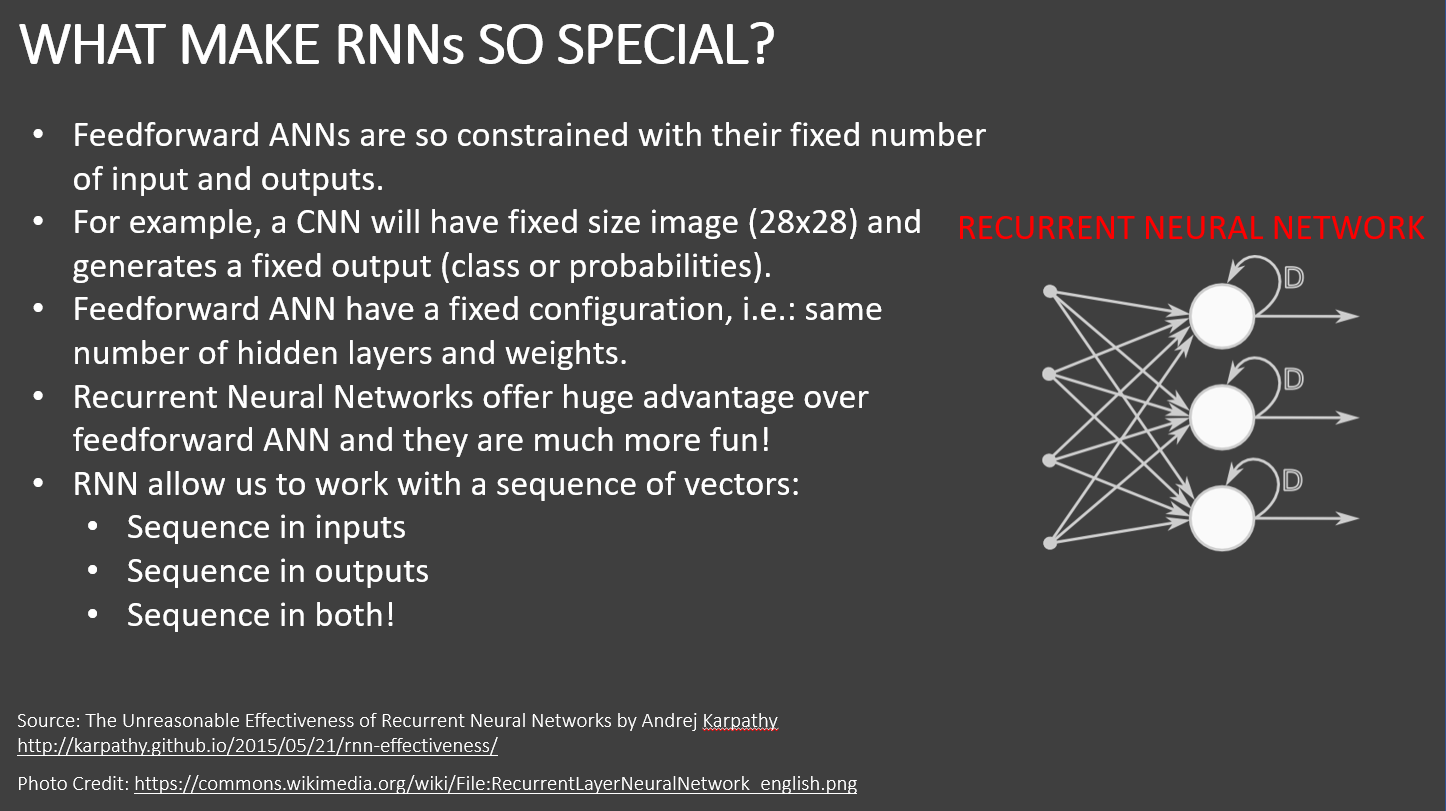

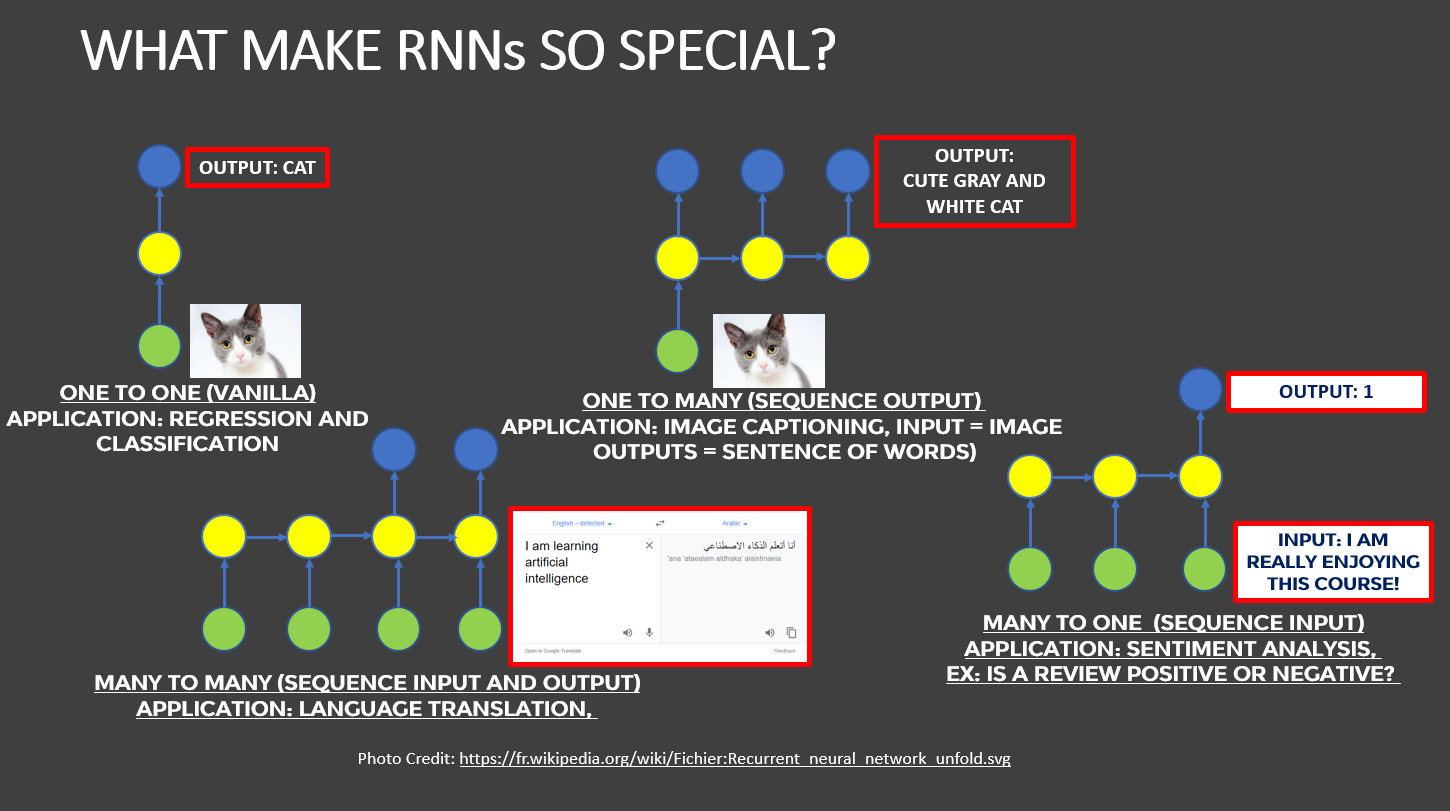

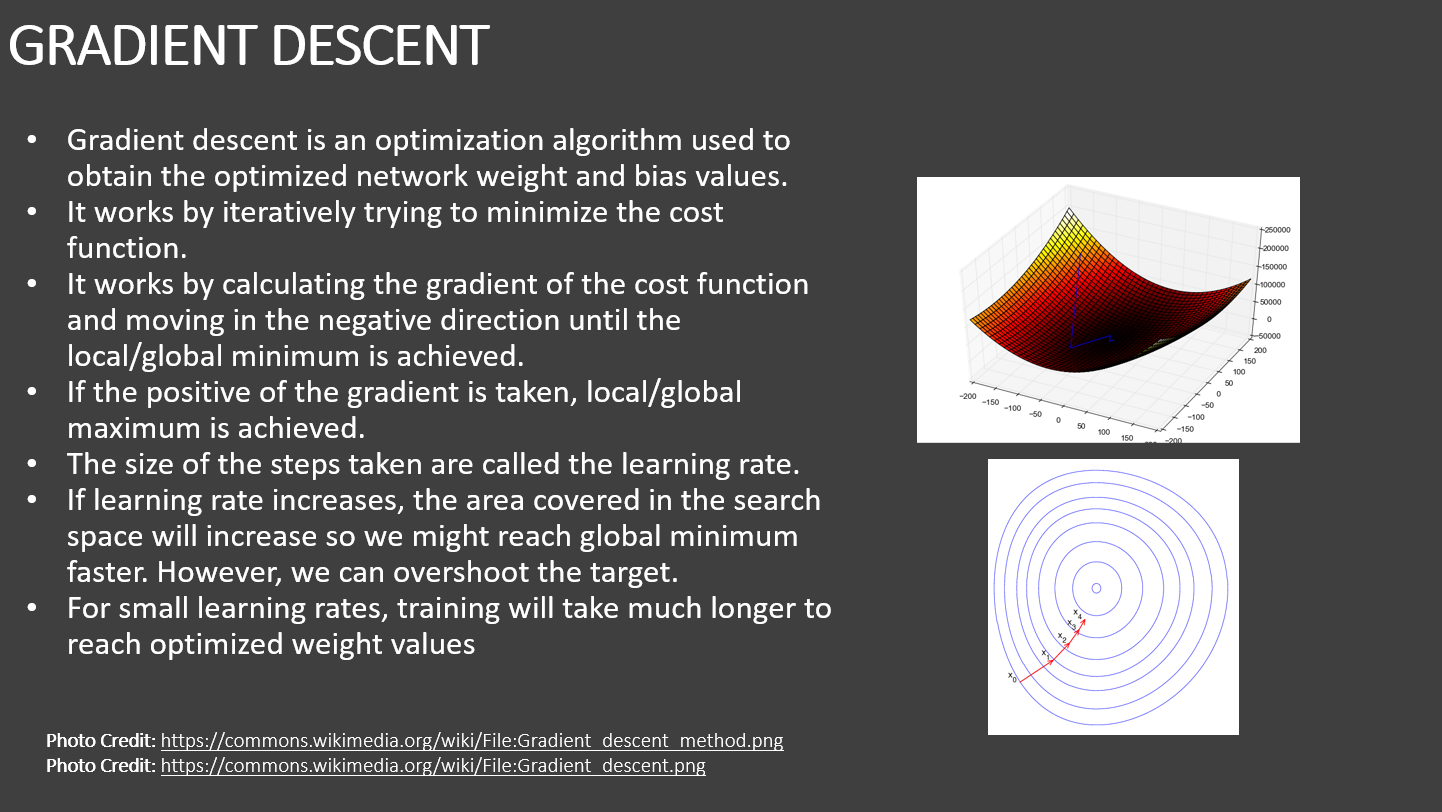

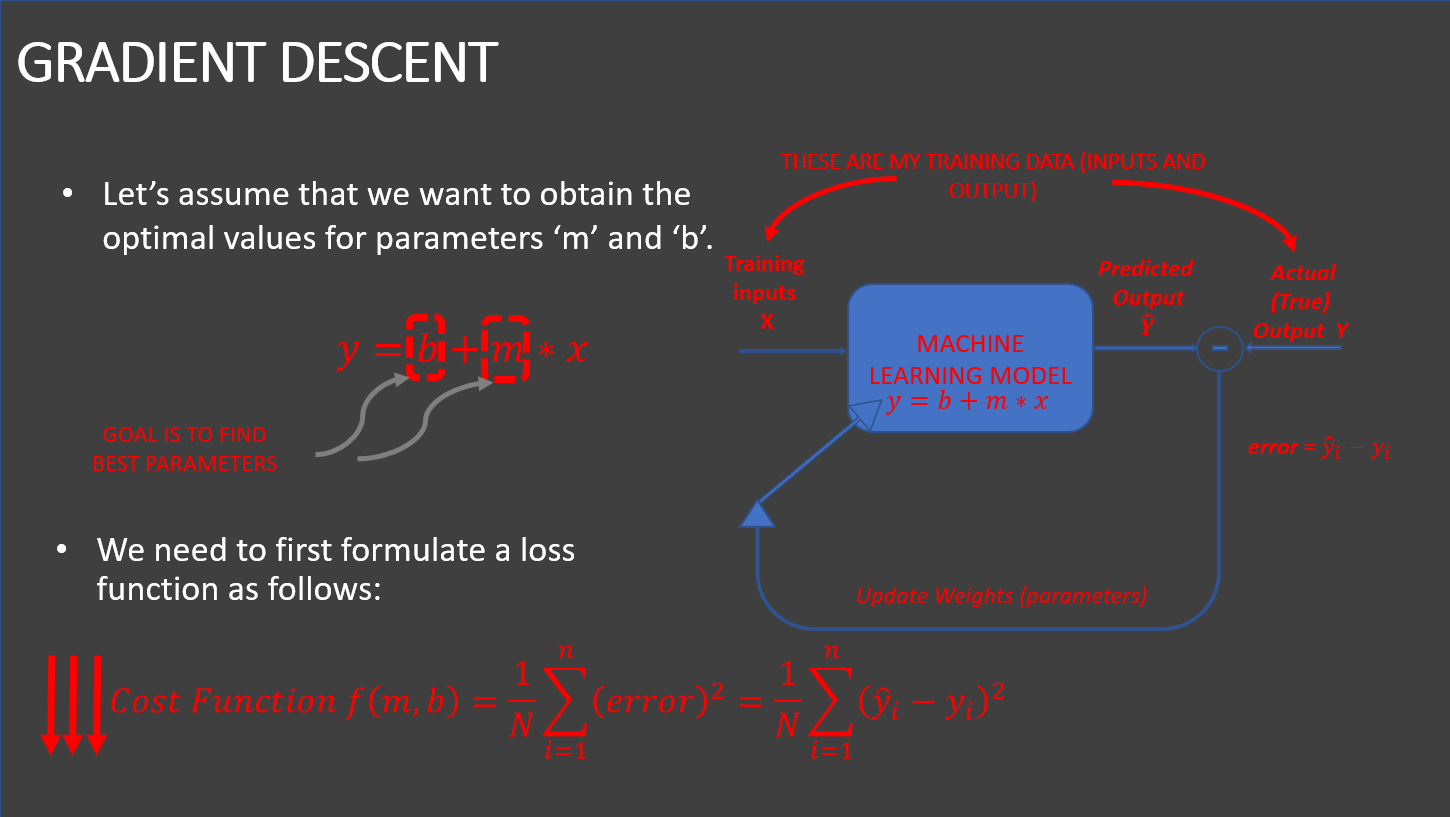

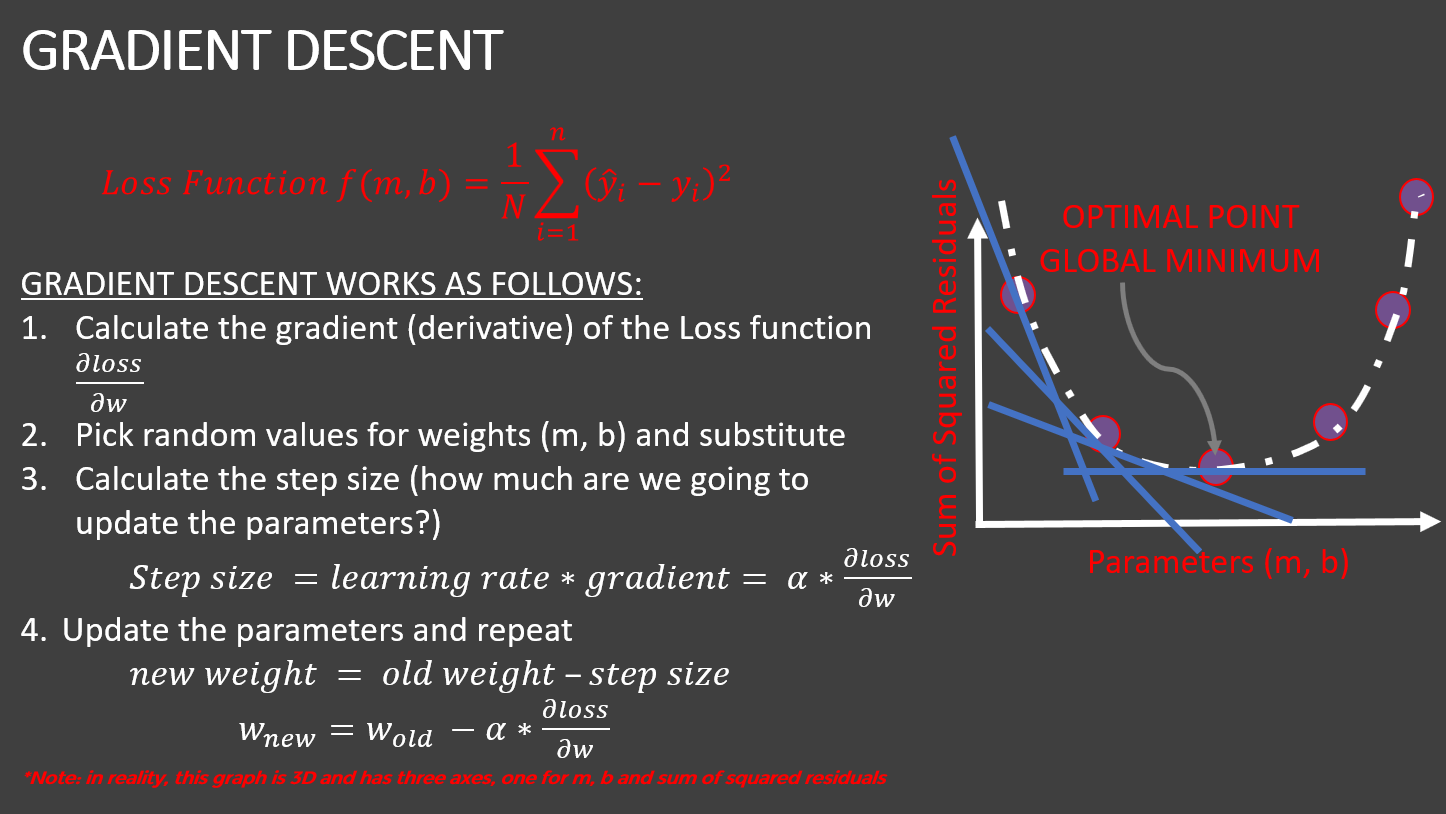

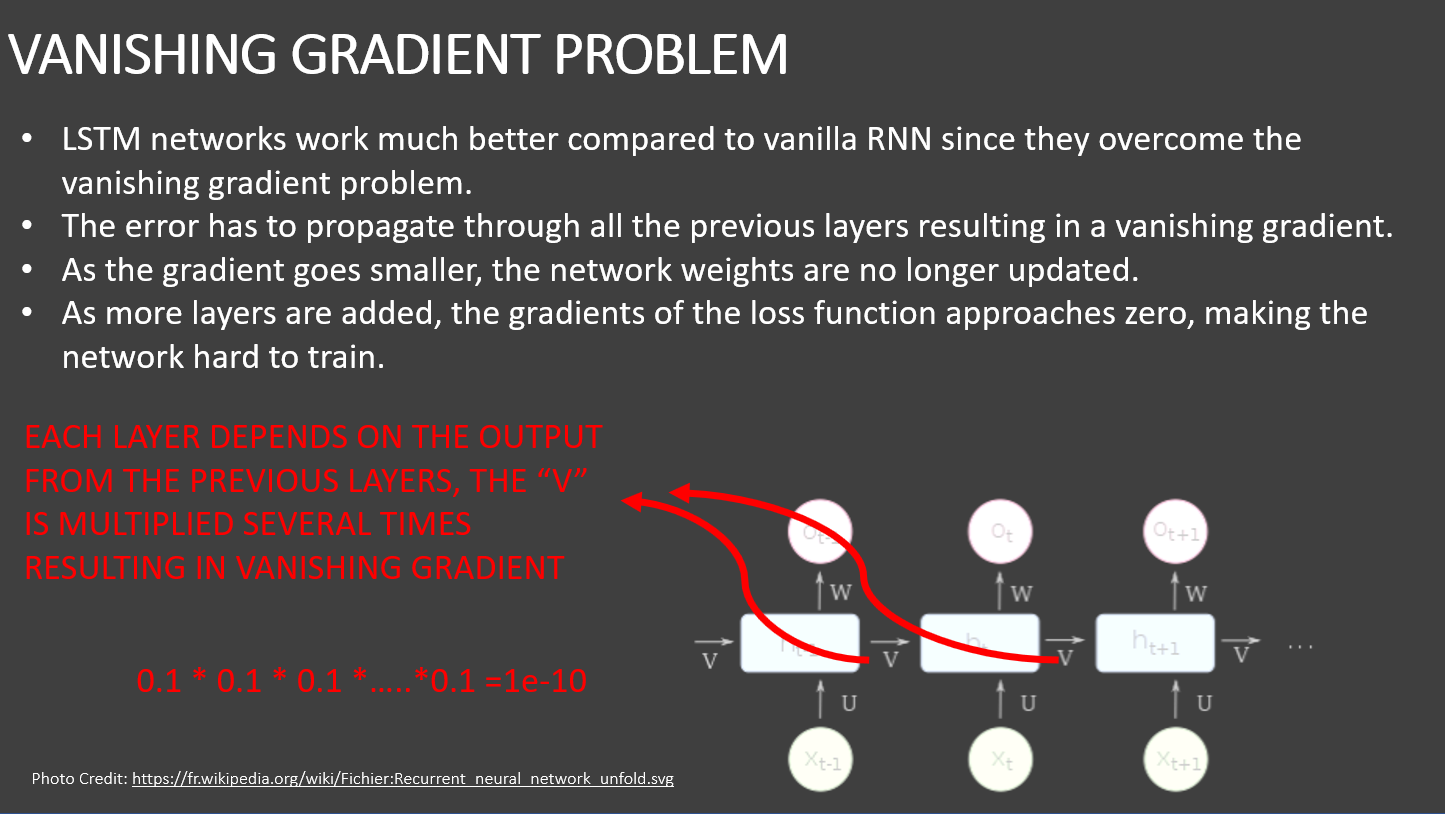

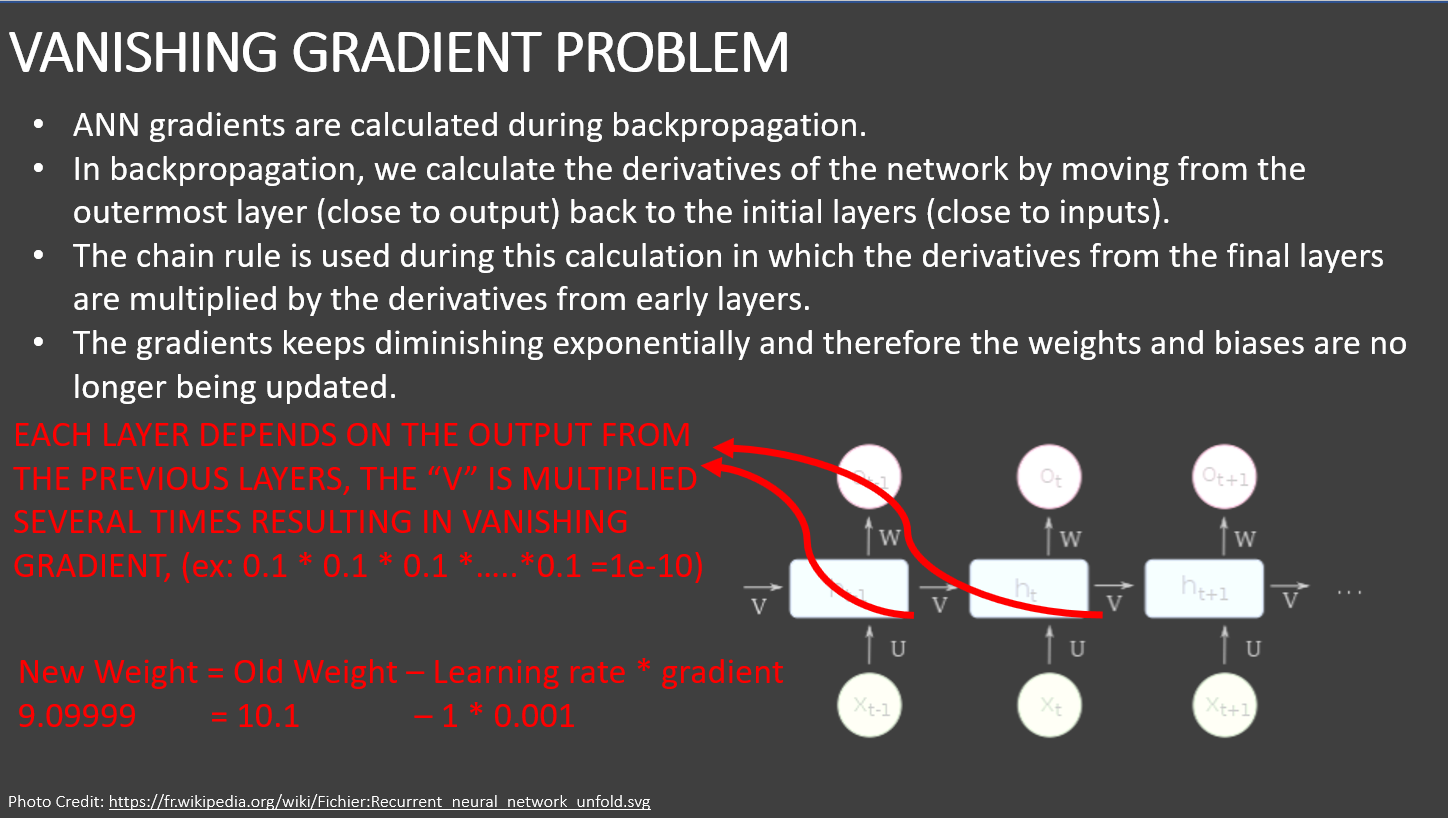

# TASK #7: UNDERSTAND THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS

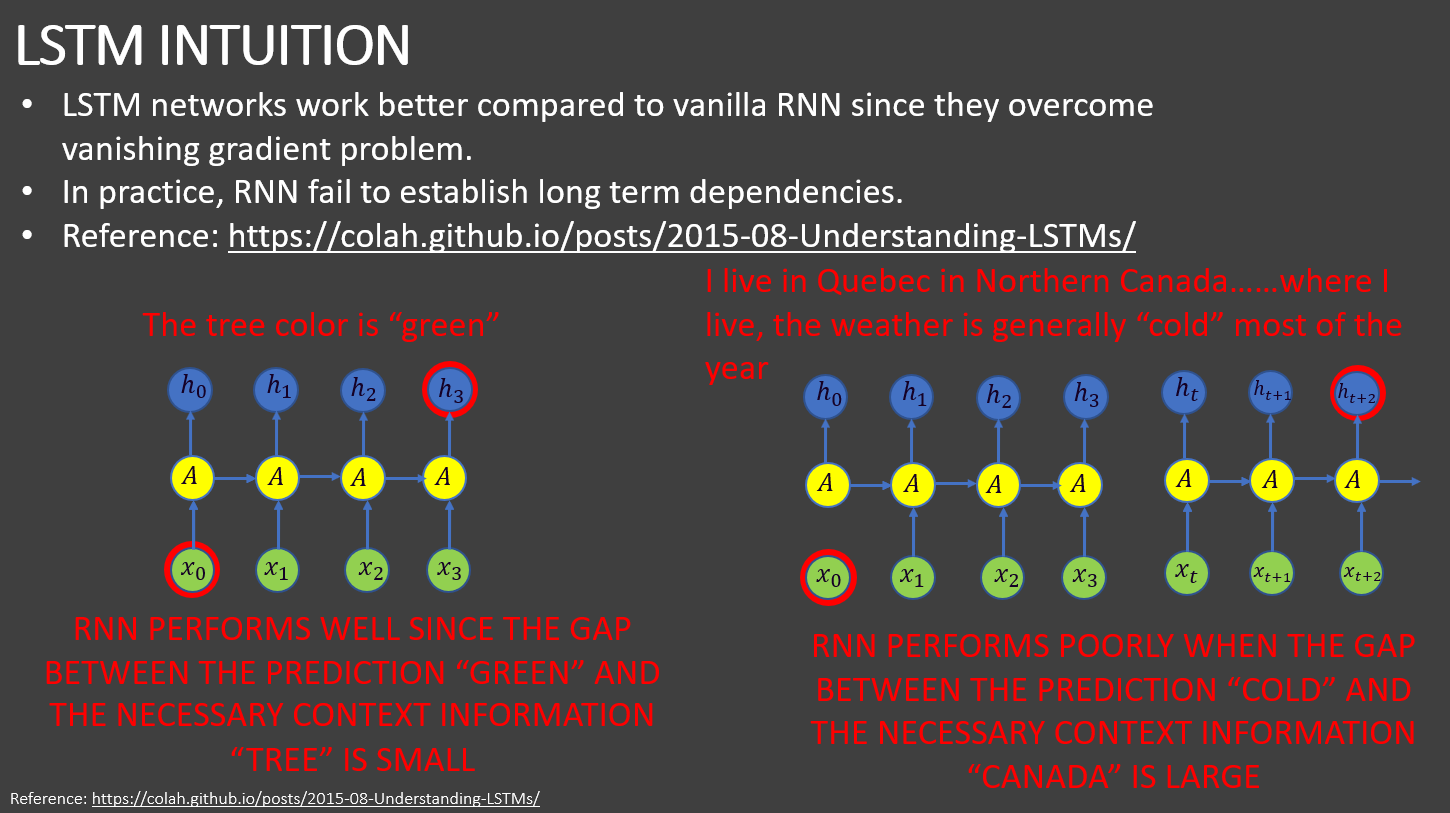

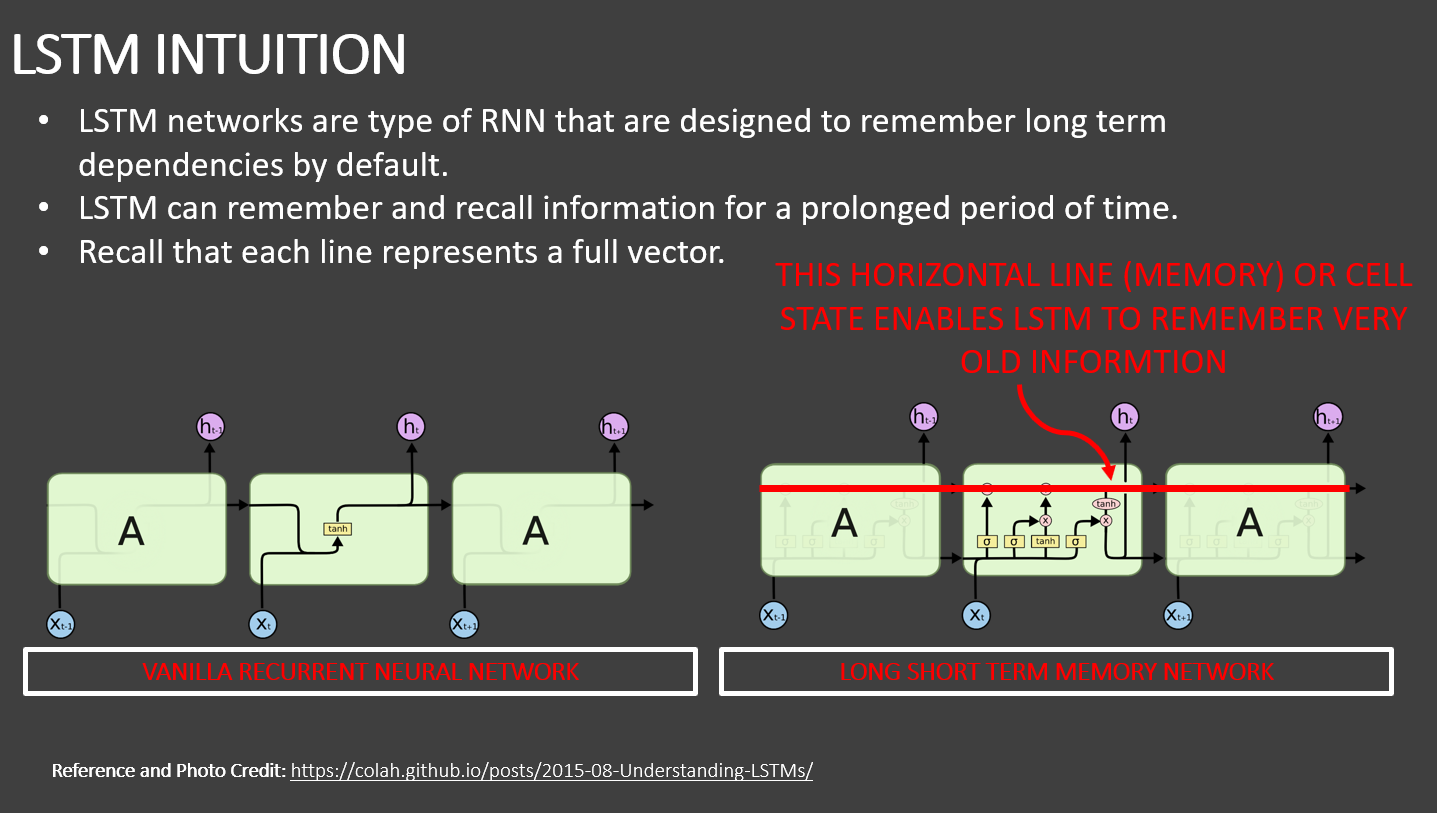

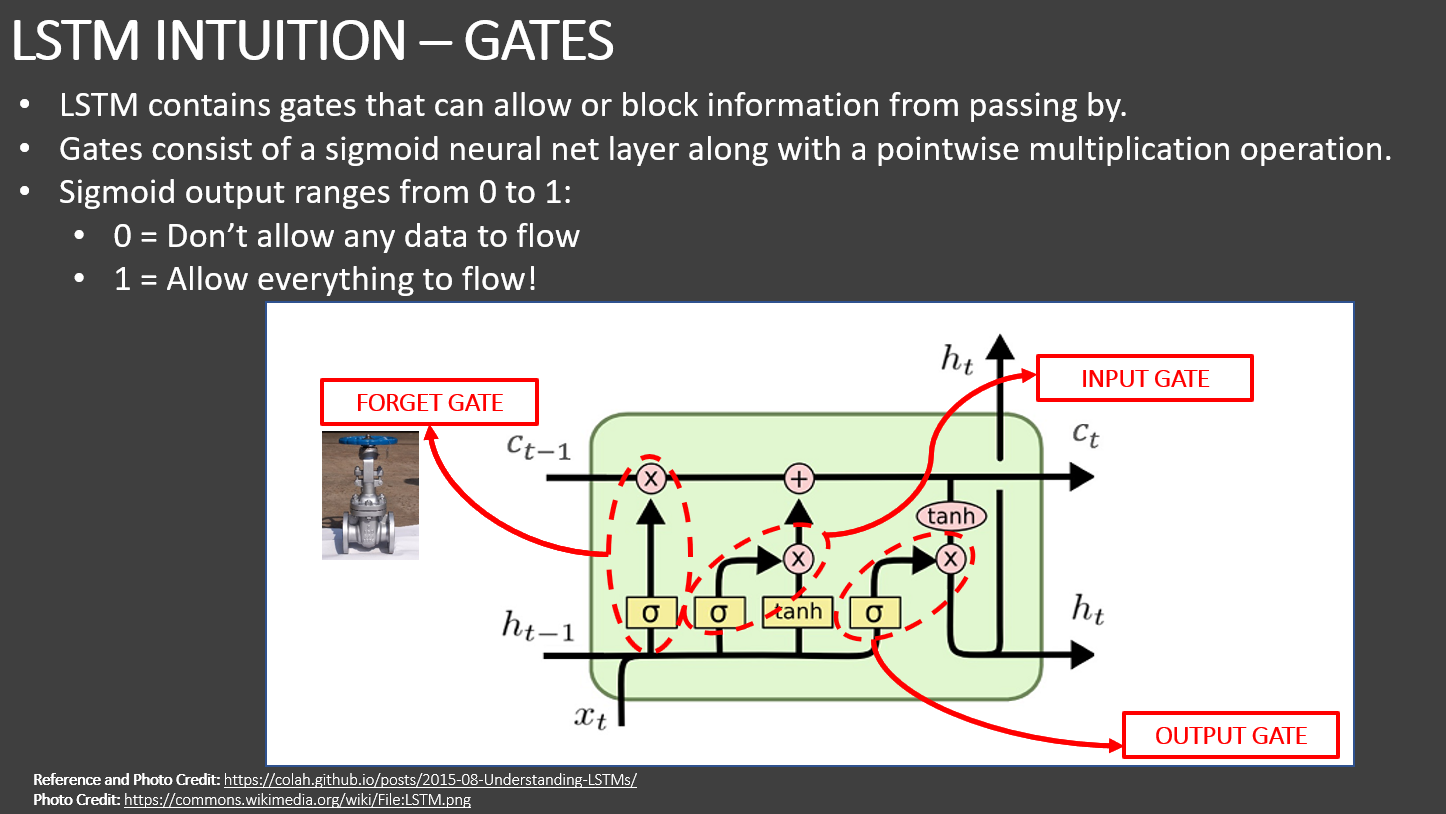

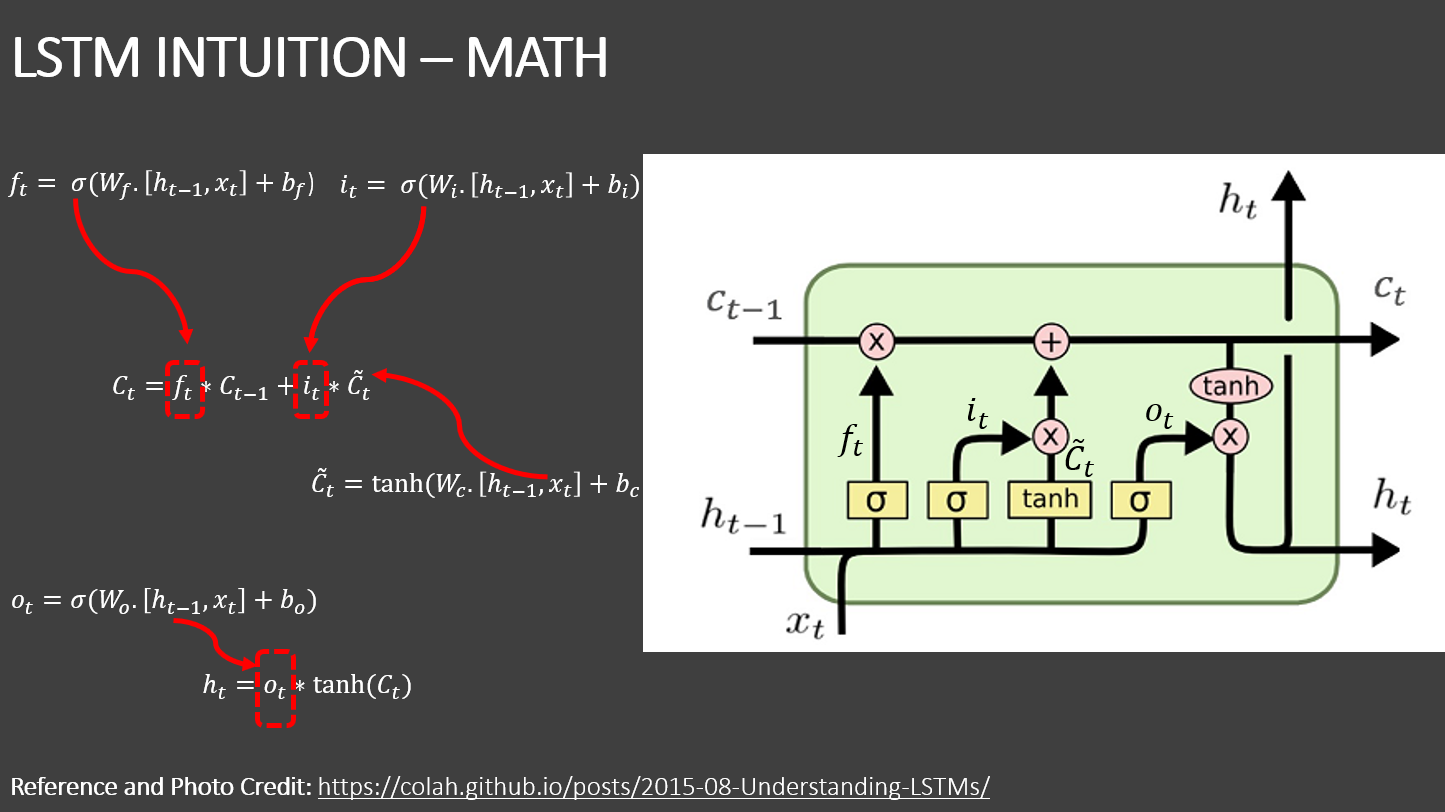

# TASK #8: BUILD AND TRAIN THE MODEL 

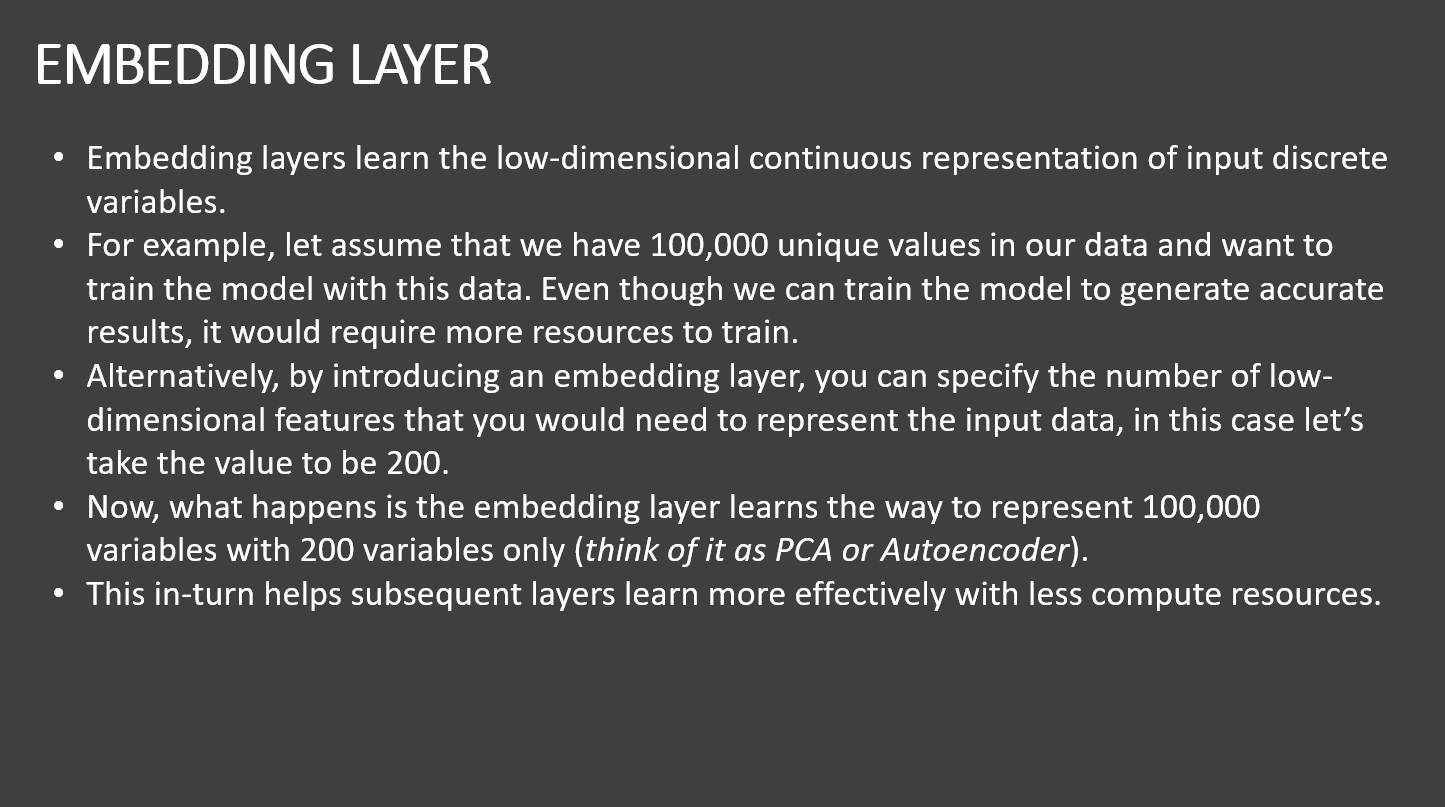

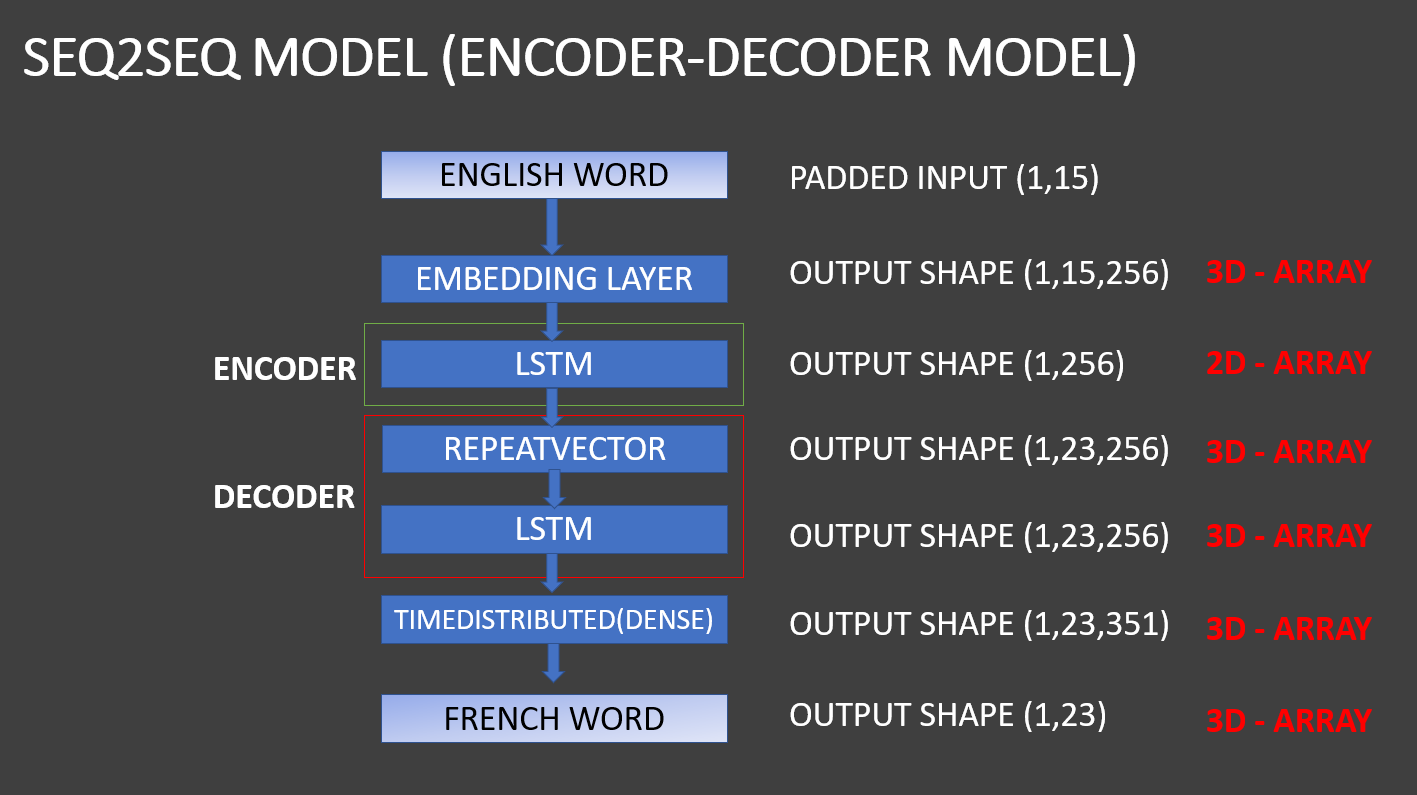

In [74]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 24, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [78]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 24, 1)

In [87]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 522s 5ms/sample - loss: 2.6091 - accuracy: 0.5168 - val_loss: 2.0798 - val_accuracy: 0.5444
Epoch 2/10
111666/111666 [==============================] - 506s 5ms/sample - loss: 1.8383 - accuracy: 0.5861 - val_loss: 1.5816 - val_accuracy: 0.6164
Epoch 3/10
111666/111666 [==============================] - 507s 5ms/sample - loss: 1.4645 - accuracy: 0.6285 - val_loss: 1.3536 - val_accuracy: 0.6430
Epoch 4/10
 61440/111666 [===============>..............] - ETA: 3:49 - loss: 1.3014 - accuracy: 0.6568

KeyboardInterrupt: 

In [91]:
x_train[3]

array([24,  1,  8, 57,  4, 39,  6,  3,  1,  9, 67,  2, 34,  0,  0])

In [92]:
# save the model

model.save("weights.h5")

MINI CHALLENGE #6:
- Train the model with different embedding output dimension and comment on model performance during training


# TASK #9: ASSESS TRAINED MODEL PERFORMANCE


In [93]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [94]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the grapefruit is our most loved fruit but the peach is my most loved 

Original French word - le pamplemousse est notre fruit le plus cher mais la pãªche est mon plus aimã©         

Predicted French word - la est est est le le le le mais mais mais est est est aimã©         




Original English word - china is sometimes hot during fall but it is never busy in september  

Original French word - la chine est parfois chaud pendant l' automne mais il est jamais occupã© en septembre         

Predicted French word - paris est est parfois en en mais mais il est est en en en          




Original English word - china is sometimes busy during september and it is never rainy in april  

Original French word - chine est parfois occupã©e en septembre et il est jamais pluvieux en avril           

Predicted French word - paris est est en en en et et il est est en en           




Original English word - they like limes oranges and pears         

Original French word -

# CONGRATULATIONS!

MINI CHALLENGE #1: 
- Explore the 'english' and 'french' data and indicate how many samples is included. 

In [ ]:
# data containing english text
df_english
# data containing frensh text
df_french

# dataframe information
df_english.info
# dataframe information
df_french.info()

# check for null values
df_english.isnull().sum()
# check for null values
df_french.isnull().sum()


MINI CHALLENGE #2:
- Concatenate both dataframes and indicate how many records are present

In [ ]:
# Concatenate Real and Fake News
df = pd.concat([df_english, df_french], axis = 1)
df

In [ ]:
print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))

MINI CHALLENGE #3:
- How many unique words are available in the english and french dictionairies?

In [ ]:
# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# number of unique words in english
total_english_words  = len(english_words)
total_english_words

# number of unique words in french
total_french_words = len(french_words)
total_french_words

MINI CHALLENGE #4 (QUIZ!): 
- Perform similar data visualizations but for the french language instead
- What are the top 3 common french words?!
- What is the maximum number of words in any french document?

In [ ]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

french_words_counts = Counter(words)
french_words_counts


# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words_counts

# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()


# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')


# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

MINI CHALLENGE #5:
- Change the padding length so that both english and french have the same length and retrain the model

In [ ]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

MINI CHALLENGE #6
- Train the model with different embedding output dimension and comment on model


In [ ]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(english_vocab_size, 128, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = Adam(lr = 1e-3), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()